# Predicting Store Type using K Nearest Neighbors

We have dataset of FMCG stores which consists of store_id with their city/town. In India the stores are classified as below:

- **Traditional Trade (TT):** Retailers who does not capture the bill_id or sales transaction using any digital devices.

- **Modern Trade (MT):** Retailers who captured every transaction using point-of-sale (POS) machine electronically and consumers have the access to expore the store and pick the products.


### Explaning the dataset

- **store_id:** Unique store identifier.
- **town:** Town/city in which the store is present.
- **area:** Area of the store in square feet.
- **self_service:** Whether the consumer has access inside the store to select/pick the product.
- **cart:** Does the store has cart to pick and keep the product for billing.
- **basket:** Does the retailer provide basket to the consumer to pick and keep the product for billing.
- **month:** Month number
- **quantity:** Quantity sold in corresponding month by the store.
- **sales_value:** Total sales amount in corresponding month by the store.
- **store_type:** Format of store (TT\MT). **(This is dependent variable)**

## Import Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
df = pd.read_csv(r"C:\ML\KNN\store_classification.csv")

In [3]:
df.head()

,store_id,town,area,self_service,cart,basket,month,quantity,sales_value,store_type
0,5080,Pune,220,1,0,1,10,14.000000,3063.000,MT
1,6175,Mahbubnagar,1000,1,0,1,10,15906.000000,761501.000,MT
2,4290,Hyderabad,500,0,0,0,7,7729.000000,220591.560,TT
3,6250,BANGALORE,600,0,0,0,7,11106.103980,4622695.858,TT
4,4533,Vijayawada,475,0,0,0,12,9893.793999,2297273.704,TT


### Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      6238 non-null   int64  
 1   town          6238 non-null   object 
 2   area          6238 non-null   int64  
 3   self_service  6238 non-null   int64  
 4   cart          6238 non-null   int64  
 5   basket        6238 non-null   int64  
 6   month         6238 non-null   int64  
 7   quantity      6238 non-null   float64
 8   sales_value   6238 non-null   float64
 9   store_type    6238 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 487.5+ KB


In [5]:
df.describe()

,store_id,area,self_service,cart,basket,month,quantity,sales_value
count,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6.238000e+03
mean,5599.124880,910.310356,0.583841,0.402212,0.559314,6.136582,13847.455952,8.146580e+05
std,1357.228802,1216.736178,0.492960,0.490384,0.496509,3.500650,23338.797538,1.324910e+06
min,144.000000,10.000000,0.000000,0.000000,0.000000,1.000000,-32006.000000,-1.536384e+06
25%,4851.000000,400.000000,0.000000,0.000000,0.000000,3.000000,1246.955000,9.924150e+04
50%,5316.000000,600.000000,1.000000,0.000000,1.000000,6.000000,5844.275000,3.922820e+05
75%,6664.000000,1000.000000,1.000000,1.000000,1.000000,9.000000,16912.500000,9.652948e+05
max,8618.000000,26000.000000,1.000000,1.000000,1.000000,12.000000,300051.814000,1.710000e+07


In [6]:
NA = [feature for feature in df.columns if df[feature].isnull().sum()>0]
NA

[]

- None of the features have blank or null value.

### Encoding the data

- Since the target variable & town variable is of categorical data type we need to convert this into numerical data. 

In [7]:
tw=sorted(list(df['town'].unique()))
twn={}
for i,j in enumerate(tw,0):
    twn[j]=i

In [8]:
df['town']=df['town'].map(twn)

In [9]:
st={'TT':0,'MT':1}
df['store_type']=df['store_type'].map(st)

In [10]:
df.head()

,store_id,town,area,self_service,cart,basket,month,quantity,sales_value,store_type
0,5080,163,220,1,0,1,10,14.000000,3063.000,1
1,6175,121,1000,1,0,1,10,15906.000000,761501.000,1
2,4290,81,500,0,0,0,7,7729.000000,220591.560,0
3,6250,21,600,0,0,0,7,11106.103980,4622695.858,0
4,4533,225,475,0,0,0,12,9893.793999,2297273.704,0


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between for the observations, and hence on the KNN classifier, as compared to variables that are on a small scale.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop(['store_id','store_type'],axis=1))

StandardScaler()

- I have dropped store_id feature because it is static and does not have correlation with dependent variable 

In [14]:
scaled_features = scaler.transform(df.drop(['store_id','store_type'],axis=1))

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:-1])
df_feat.head()

,town,area,self_service,cart,basket,month,quantity,sales_value
0,0.954017,-0.567391,0.844272,-0.820265,0.887640,1.103717,-0.592771,-0.612615
1,0.302541,0.073719,0.844272,-0.820265,0.887640,1.103717,0.088210,-0.040124
2,-0.317913,-0.337249,-1.184452,-0.820265,-1.126583,0.246665,-0.262179,-0.448418
3,-1.248593,-0.255055,-1.184452,-0.820265,-1.126583,0.246665,-0.117468,2.874416
4,1.915720,-0.357798,-1.184452,-0.820265,-1.126583,1.675085,-0.169417,1.119121


## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['store_type'],
                                                    test_size=0.30,random_state=42)

## Using KNN

In KNN algorithm, "K" is the number of neighbouring element to a new obsrervation which decided the class of the new observation based on minimum distance criteria.

**Initiating the algorithm with K=1**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions and Evaluations

In [21]:
pred = knn.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,pred))

[[841  31]
 [ 19 981]]


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       872
           1       0.97      0.98      0.98      1000

    accuracy                           0.97      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.97      0.97      0.97      1872



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [25]:
error_rate = []

for i in range(1,35):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

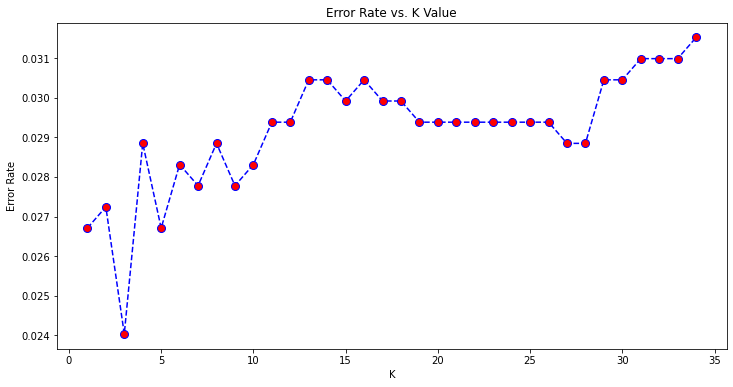

In [26]:
plt.figure(figsize=(12,6))
plt.plot(range(1,35),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

- From the above graph it is clear that the error rate increases with the increase in K-value.
- For K=3, the error rate is minimum.

In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[841  31]
 [ 19 981]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       872
           1       0.97      0.98      0.98      1000

    accuracy                           0.97      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.97      0.97      0.97      1872



In [28]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[836  36]
 [  9 991]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       872
           1       0.96      0.99      0.98      1000

    accuracy                           0.98      1872
   macro avg       0.98      0.97      0.98      1872
weighted avg       0.98      0.98      0.98      1872



#### Observation

- ***Accuracy is 97% at K=1.***
- ***Accuracy is 98% at K=3.***

                                            Thanks for Visiting 🙏🙏